In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data parsing
notes_data = pd.read_csv('Test_set/notes.csv')

path_input_csv = 'comments_2023-06-17_2133_sentiment.csv'
comment_data = pd.read_csv(path_input_csv, sep=';')

episode_likes_agg = comment_data.groupby(["series_name", "series_genre"]).agg({
    "Episode_Likes": "mean",
    "Sentiment_Score_comment": "mean"
}).reset_index()

merged_data = pd.merge(notes_data, episode_likes_agg, on=["series_name", "series_genre"])

# Pre-processing part, drop na
selected_columns = ["Episode_Likes", "Sentiment_Score_comment", "notes"]
merged_data = merged_data[selected_columns].dropna()

# Test set and class set
X = merged_data[["Episode_Likes", "Sentiment_Score_comment"]]
y = merged_data["notes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training/Evaluation/Prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

#Test with new random data
random_data = pd.DataFrame({
    "Episode_Likes": [10000, 20000, 30000, 15000, 25000, 35000, 12000, 18000, 22000, 28000],
    "Sentiment_Score_comment": [0.01, 0.025, 0.007, 0.016, -0.04, 0.009, -0.007, 0.006, -0.005, -0.008]
})

predicted_note = regressor.predict(random_data)

print("Predicted Note:", predicted_note)

Mean Squared Error: 0.11168040618349229
R-squared: 0.9396191575565028
Predicted Note: [8.60898103 8.91794663 9.00201    8.753241   8.57832604 9.11900909
 8.53446977 8.74711001 8.75483752 8.85843425]


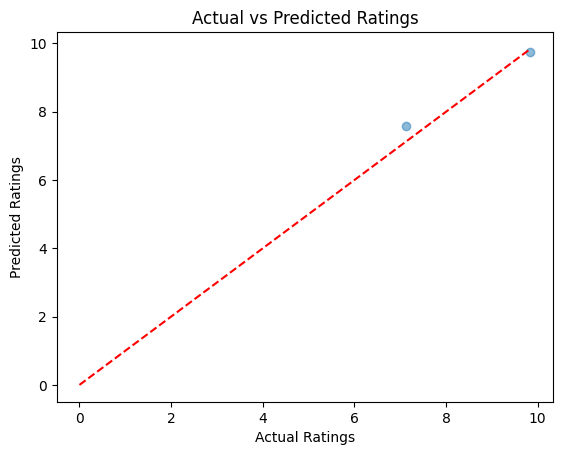

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predicted ratings (y_pred) and actual ratings (y_test)

# Create a scatter plot of actual vs predicted ratings
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line for reference (perfect predictions)
max_rating = max(np.max(y_test), np.max(y_pred))
plt.plot([0, max_rating], [0, max_rating], color='red', linestyle='--')

# Set labels and title
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')

# Show the plot
plt.show()